# Multiple Linear Regression Demo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv(r'C:\Sanrusha-Canon Laptop\Udemy\Machine Learning\SampleDataSet\auto-mpg.data',delimiter='\s+',header=None,names=(['mpg','cylinders','dsplacement','horsepower','weight','acceleration','mode year','origin','car name']))
df.head()

,mpg,cylinders,dsplacement,horsepower,weight,acceleration,mode year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#Data Exploration

In [3]:
df.shape

(398, 9)

In [4]:
df=df.drop(df[df.horsepower=="?"].index)
df.shape

(392, 9)

In [5]:
df['horsepower']=pd.to_numeric(df['horsepower'])

In [6]:
df.applymap(np.isreal)

,mpg,cylinders,dsplacement,horsepower,weight,acceleration,mode year,origin,car name
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
5,True,True,True,True,True,True,True,True,False
6,True,True,True,True,True,True,True,True,False
7,True,True,True,True,True,True,True,True,False
8,True,True,True,True,True,True,True,True,False
9,True,True,True,True,True,True,True,True,False


In [7]:
df1 = df._get_numeric_data()
df1.head()

,mpg,cylinders,dsplacement,horsepower,weight,acceleration,mode year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
#Variance Inflation Factor
X=df1.drop(['mpg','origin'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,116.0,cylinders
1,86.5,dsplacement
2,60.3,horsepower
3,137.5,weight
4,69.4,acceleration
5,109.3,mode year


In [9]:
df1 = df._get_numeric_data()

In [10]:
X=df1.drop(['mpg','origin','weight','cylinders','mode year','horsepower'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.1,dsplacement
1,3.1,acceleration


In [11]:
y=df['mpg']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


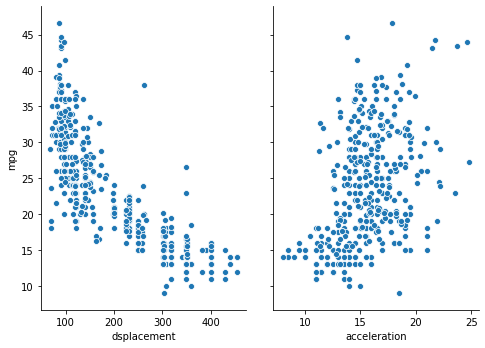

In [12]:
sns.pairplot(df,x_vars=['dsplacement','acceleration'],y_vars='mpg',size=5,aspect=0.7)
plt.show()

##Data Model preparation

In [13]:
#split data in train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(313, 2) (79, 2) (313,) (79,)


In [14]:
#train the model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#predict y
y_pred=linear_reg.predict(X_test)

In [16]:
#Evaluate the model

In [17]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('R2 Score', r2_score(y_test,y_pred))
print('Y intercept ',linear_reg.intercept_)
print('Coefficients ',linear_reg.coef_)

R2 Score 0.6776844822150516
Y intercept  34.6121420873792
Coefficients  [-0.05996739  0.02771476]


In [18]:
#Muliple linear equation
#y=-0.008728-0.07715['cylinders']+0.236['dsplacement']-0.0446['horsepower']-0.7511['weight']+0.0516['acceleration']+0.349679['mode year']+0.1044["origin"]+0.04263['car name']

In [19]:
#df=df.drop(['weight'], axis=1)
df.corr()

,mpg,cylinders,dsplacement,horsepower,weight,acceleration,mode year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
dsplacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
mode year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [20]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
df = df._get_numeric_data()
df.head()

,mpg,cylinders,dsplacement,horsepower,weight,acceleration,mode year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [21]:
#pd.DataFrame(X,columns=['constant','dsplacement','horsepower','acceleration','mode year','origin','car name']).head()

In [22]:
import statsmodels.api as sm
X=sm.add_constant(X)
regressorOLS = sm.OLS(y, X).fit()
regressorOLS.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     358.9
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           4.74e-89
Time:                        22:25:16   Log-Likelihood:                -1156.2
No. Observations:                 392   AIC:                             2318.
Df Residuals:                     389   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.1882      1.922     18.828      0.000      32.409      39.967
dsplacement     -0.0609      0.003    -22.791      0.000      -0.066      -0.056
acceleration    -0.0582      0.101     -0.575      0.566      -0.257       0.141
==============================================================================
Omnibus:                       43.926   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.179
Skew:                           0.725   Prob(JB):                     1.57e-15
Kurtosis:                       4.440   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
Xelm=X.drop(['acceleration'], axis=1)
regressorOLS = sm.OLS(y, Xelm).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           1.66e-90
Time:                        22:25:16   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.1206      0.494     71.033      0.000      34.149      36.093
dsplacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#train the model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
#predict y
y_pred=linear_reg.predict(X_test)

(313, 3) (79, 3) (313,) (79,)


In [25]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(15)

,Actual,Predicted
146,28.0,29.616941
282,22.3,26.696172
69,12.0,13.997704
378,38.0,28.722973
331,33.8,29.294171
257,19.4,21.176401
310,38.1,29.796082
328,30.0,26.461084
125,20.0,23.195892
108,20.0,29.321885


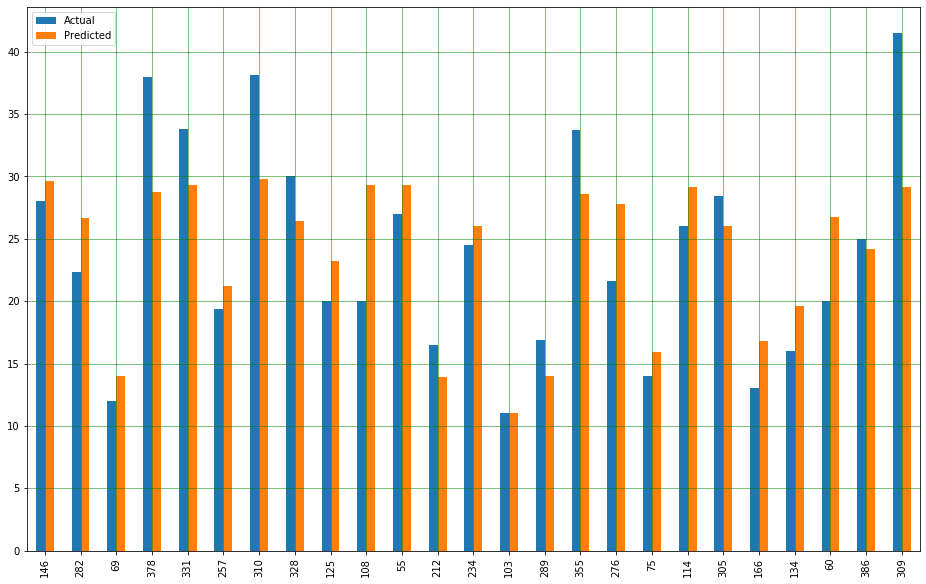

In [26]:
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()